# 클래스 공부 (4) / 메소드 **init**

이정민  
2025-12-02

### Import

In [25]:
import matplotlib.pyplot as plt
from IPython.core.display import HTML

## self는 항상 써야함

In [ ]:
class Klass:
  def hello(self): # hello 메소드 안에 self를 꼭 입력
    print("hello")

In [ ]:
ins = Klass()

In [ ]:
ins.hello()

hello

## **init** 사용

In [ ]:
# class 예제 1

In [ ]:
class Klass():
  def __init__(self):
    self.a = True
  def show(self):
    print(self.a)

In [ ]:
ins = Klass()

In [ ]:
ins.show()

True

In [ ]:
# class 예제 2-1

In [ ]:
class Klass():
  def __init__(self):
    self.a = True
  def toggle(self):
    if self.a == True:
      self.a = False
    elif self.a == False:
      self.a = True
  def show(self):
    print(self.a)

In [ ]:
ins = Klass()

In [ ]:
ins.toggle()
ins.show()

False

In [ ]:
# class 예제 2-2

In [ ]:
class Klass():
  def __init__(self):
    self.a = True
  def toggle(self):
    self.a = not self.a
  def show(self):
    print(self.a)

In [ ]:
ins = Klass()

In [ ]:
ins.toggle()
ins.show()

True

In [ ]:
# class 예제 3

In [ ]:
class Klass():
  def __init__(self):
    self.a = 0
  def up(self):
    self.a = self.a +1
  def show(self):
    print(self.a)

In [ ]:
ins = Klass()

In [ ]:
ins.a

In [ ]:
ins.up()

In [ ]:
ins.a

In [ ]:
## 예제4

In [ ]:
class Klass:
  def __init__(self,value):
    self.a = value
  def show(self):
    print(self.a)

In [ ]:
ins = Klass(24)

In [ ]:
ins.show()

24

In [ ]:
#예제5

In [ ]:
class Klass:
  def __init__(self):
    self.a = 0
  def up(self):
    self.a = self.a +1
  def jump(self,jump_size):
    self.a = self.a + jump_size
  def show(self):
    print('a의 값은 {}입니다.'.format(self.a))

In [ ]:
ins = Klass()

In [ ]:
ins.a

In [ ]:
ins.jump(234)
ins.show()

a의 값은 234입니다.

In [ ]:
# 예제6

In [26]:
class Klass:
  def __init__(self):
    self.a = 0
  def up(self):
    self.a = self.a +1
  def jump(self,jump_size):
    self.a = self.a + jump_size
  def reset(self):
    self.a = 0 ### self.__init__() 코드와 동일
  def show(self):
    print('a의 값은 {}입니다.'.format(self.a))

In [27]:
ins = Klass()

In [28]:
ins.jump(234)
ins.show()

a의 값은 234입니다.

In [29]:
ins.reset()
ins.show()

a의 값은 0입니다.

In [ ]:
# 예제7 / 이미지 삽입

In [138]:
class Klass:
  def __init__(self):
    self.url = 'https://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2023/07/21/4a6e5d86-eafd-4c4c-a252-faf00c45cfcc.jpg'
  def show(self):
    html_str = '<img src={url} width=250>'.format(url=self.url)
    display(HTML(html_str))

In [139]:
ins = Klass()

In [38]:
ins.show()

In [ ]:
# 예제8

In [140]:
class Klass:
  def __init__(self):
    self.n = 0
    self.url = 'https://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2023/07/21/4a6e5d86-eafd-4c4c-a252-faf00c45cfcc.jpg'
  def show(self):
    self.n = self.n + 1
    html_str = '<img src={url} width=250>'.format(url=self.url)
    print('당신은 뉴진스를 {}번 봤습니다.'.format(self.n))
    display(HTML(html_str))

In [141]:
ins = Klass()

In [143]:
ins.show()

당신은 뉴진스를 2번 봤습니다.

## **12wk-2 과제**

### import

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()

> 과제1

In [108]:
class Stock:
  def __init__(self):
    self.y = None
    self.sy = None
  def crawling(self,start_date,end_date,code):
    self.y = yf.download(code, start=start_date, end=end_date)['Adj Close'].to_numpy()
  def smoothing(self,n):
    T = len(self.y)
    self.n = n
    M = (np.eye(T) + np.array([abs(i-j)<2 for i in range(T) for j in range(T)]).reshape(T,T))/4
    M[0,0] = 3/4
    M[-1,-1] = 3/4
    self.sy = np.linalg.matrix_power(M,self.n)@self.y
  def plot(self):
    plt.plot(y,label='y')
    plt.plot(self.sy,label='y_hat')
    plt.legend()

In [109]:
ins = Stock()

In [110]:
# kakao 인스턴스
code = '035720.KS'
start_date = '2023-01-01'
end_date = '2023-05-26'

In [111]:
ins.crawling(start_date,end_date,code)

[*********************100%%**********************]  1 of 1 completed

In [116]:
ins.smoothing(100)

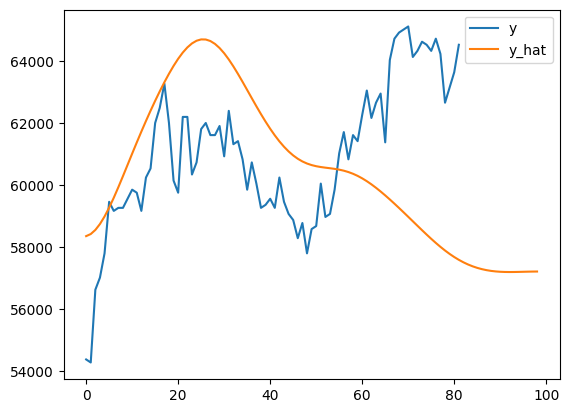

In [117]:
ins.plot()

> 과제2

In [132]:
class LinearRegression:
  def __init__(self,x,y):
    self.x = x
    self.y = y
  def fit(self):
    self.X = np.stack([np.ones(len(self.x)),x],axis=1)
    self.y_hat = self.X@(np.linalg.inv((self.X).T@self.X))@((self.X).T@self.y)
  def plot(self):
    plt.plot(self.x,self.y,'o',label='(x,y)')
    plt.plot(self.x,self.y_hat,'--r',label='(x,y_hat)')
    plt.legend()

In [134]:
x = np.array(
    [0.007, 0.008, 0.008, 0.011, 0.037, 0.047, 0.059, 0.07 , 0.072,
     0.075, 0.078, 0.08 , 0.082, 0.11 , 0.114, 0.117, 0.133, 0.15 ,
     0.161, 0.163, 0.172, 0.208, 0.209, 0.221, 0.229, 0.231, 0.234,
     0.235, 0.249, 0.251, 0.256, 0.269, 0.269, 0.273, 0.275, 0.298,
     0.305, 0.309, 0.34 , 0.362, 0.371, 0.374, 0.382, 0.387, 0.388,
     0.394, 0.395, 0.397, 0.401, 0.404, 0.419, 0.433, 0.436, 0.466,
     0.481, 0.492, 0.495, 0.508, 0.511, 0.512, 0.554, 0.57 , 0.574,
     0.575, 0.584, 0.6  , 0.601, 0.615, 0.618, 0.623, 0.629, 0.633,
     0.646, 0.65 , 0.654, 0.662, 0.673, 0.686, 0.702, 0.744, 0.754,
     0.766, 0.772, 0.781, 0.798, 0.8  , 0.807, 0.836, 0.837, 0.871,
     0.873, 0.877, 0.879, 0.889, 0.891, 0.902, 0.904, 0.923, 0.952,
     0.981]
)
y = np.array(
    [4.004, 4.189, 5.483, 4.902, 5.174, 4.468, 4.95 , 4.463, 5.476,
     4.446, 4.764, 5.244, 4.357, 4.796, 5.464, 4.196, 5.244, 4.868,
     5.358, 4.493, 4.831, 4.716, 4.929, 4.588, 4.718, 4.389, 4.985,
     4.266, 4.291, 3.697, 4.248, 4.88 , 5.126, 4.563, 4.131, 4.728,
     4.168, 4.584, 3.953, 4.747, 3.592, 5.023, 4.601, 3.904, 4.092,
     4.37 , 3.922, 4.145, 4.576, 4.25 , 4.051, 3.616, 4.634, 3.496,
     4.631, 4.025, 4.197, 4.226, 4.808, 3.676, 3.834, 3.197, 4.36 ,
     3.547, 3.956, 3.522, 4.26 , 3.443, 3.97 , 4.068, 4.186, 3.262,
     3.452, 3.946, 3.875, 3.444, 3.501, 3.959, 3.843, 2.679, 3.266,
     3.506, 2.916, 3.714, 4.007, 2.795, 3.329, 2.756, 3.72 , 2.381,
     2.798, 3.035, 3.492, 3.22 , 3.073, 3.85 , 3.233, 3.396, 3.264,
     2.986]
)

In [135]:
LR = LinearRegression(x,y)

In [136]:
LR.fit()

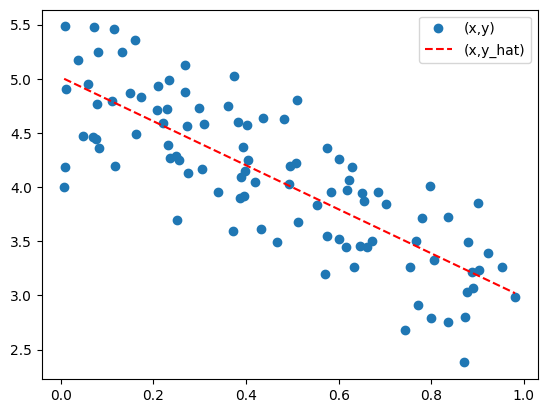

In [137]:
LR.plot()